In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
import statsmodels.api as sm
from ast import literal_eval

In [8]:
sns.set_context('paper')
sns.set_style('darkgrid')

In [4]:
# path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movie_cast_AND_dummy_vars.csv'
# df = pd.read_csv(path)
# df.head(2)

In [5]:
adj_money = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/budget_revenue_adj.csv'
df = pd.read_csv(adj_money)
df.head()

,tconst,primaryTitle,startYear,budget,revenue,CPI ratio 2019,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,230000,194183034,1.232937,283575.559996,2.394155e+08
1,tt2309260,The Gallows,2015,100000,42664410,1.078565,107856.485741,4.601633e+07
2,tt0876294,Zombie Diaries,2006,9300,2000000,1.268145,11793.747972,2.536290e+06
3,tt0907657,Once,2007,160000,20710513,1.232937,197269.954780,2.553476e+07
4,tt0374900,Napoleon Dynamite,2004,400000,46118097,1.353498,541399.214962,6.242075e+07


In [19]:
df.budget.min(), df.budget_adj.min()

(1000, 1250.1357115160913)

In [20]:
df.budget.max(), df.budget_adj.max()

(380000000, 431865063.97828615)

In [26]:
budget_values = np.arange(0, 450000000, 100000000)
budget_labels = [f'${str(int(value/1000000))}M' for value in budget_values]
budget_labels

['$0M', '$100M', '$200M', '$300M', '$400M']

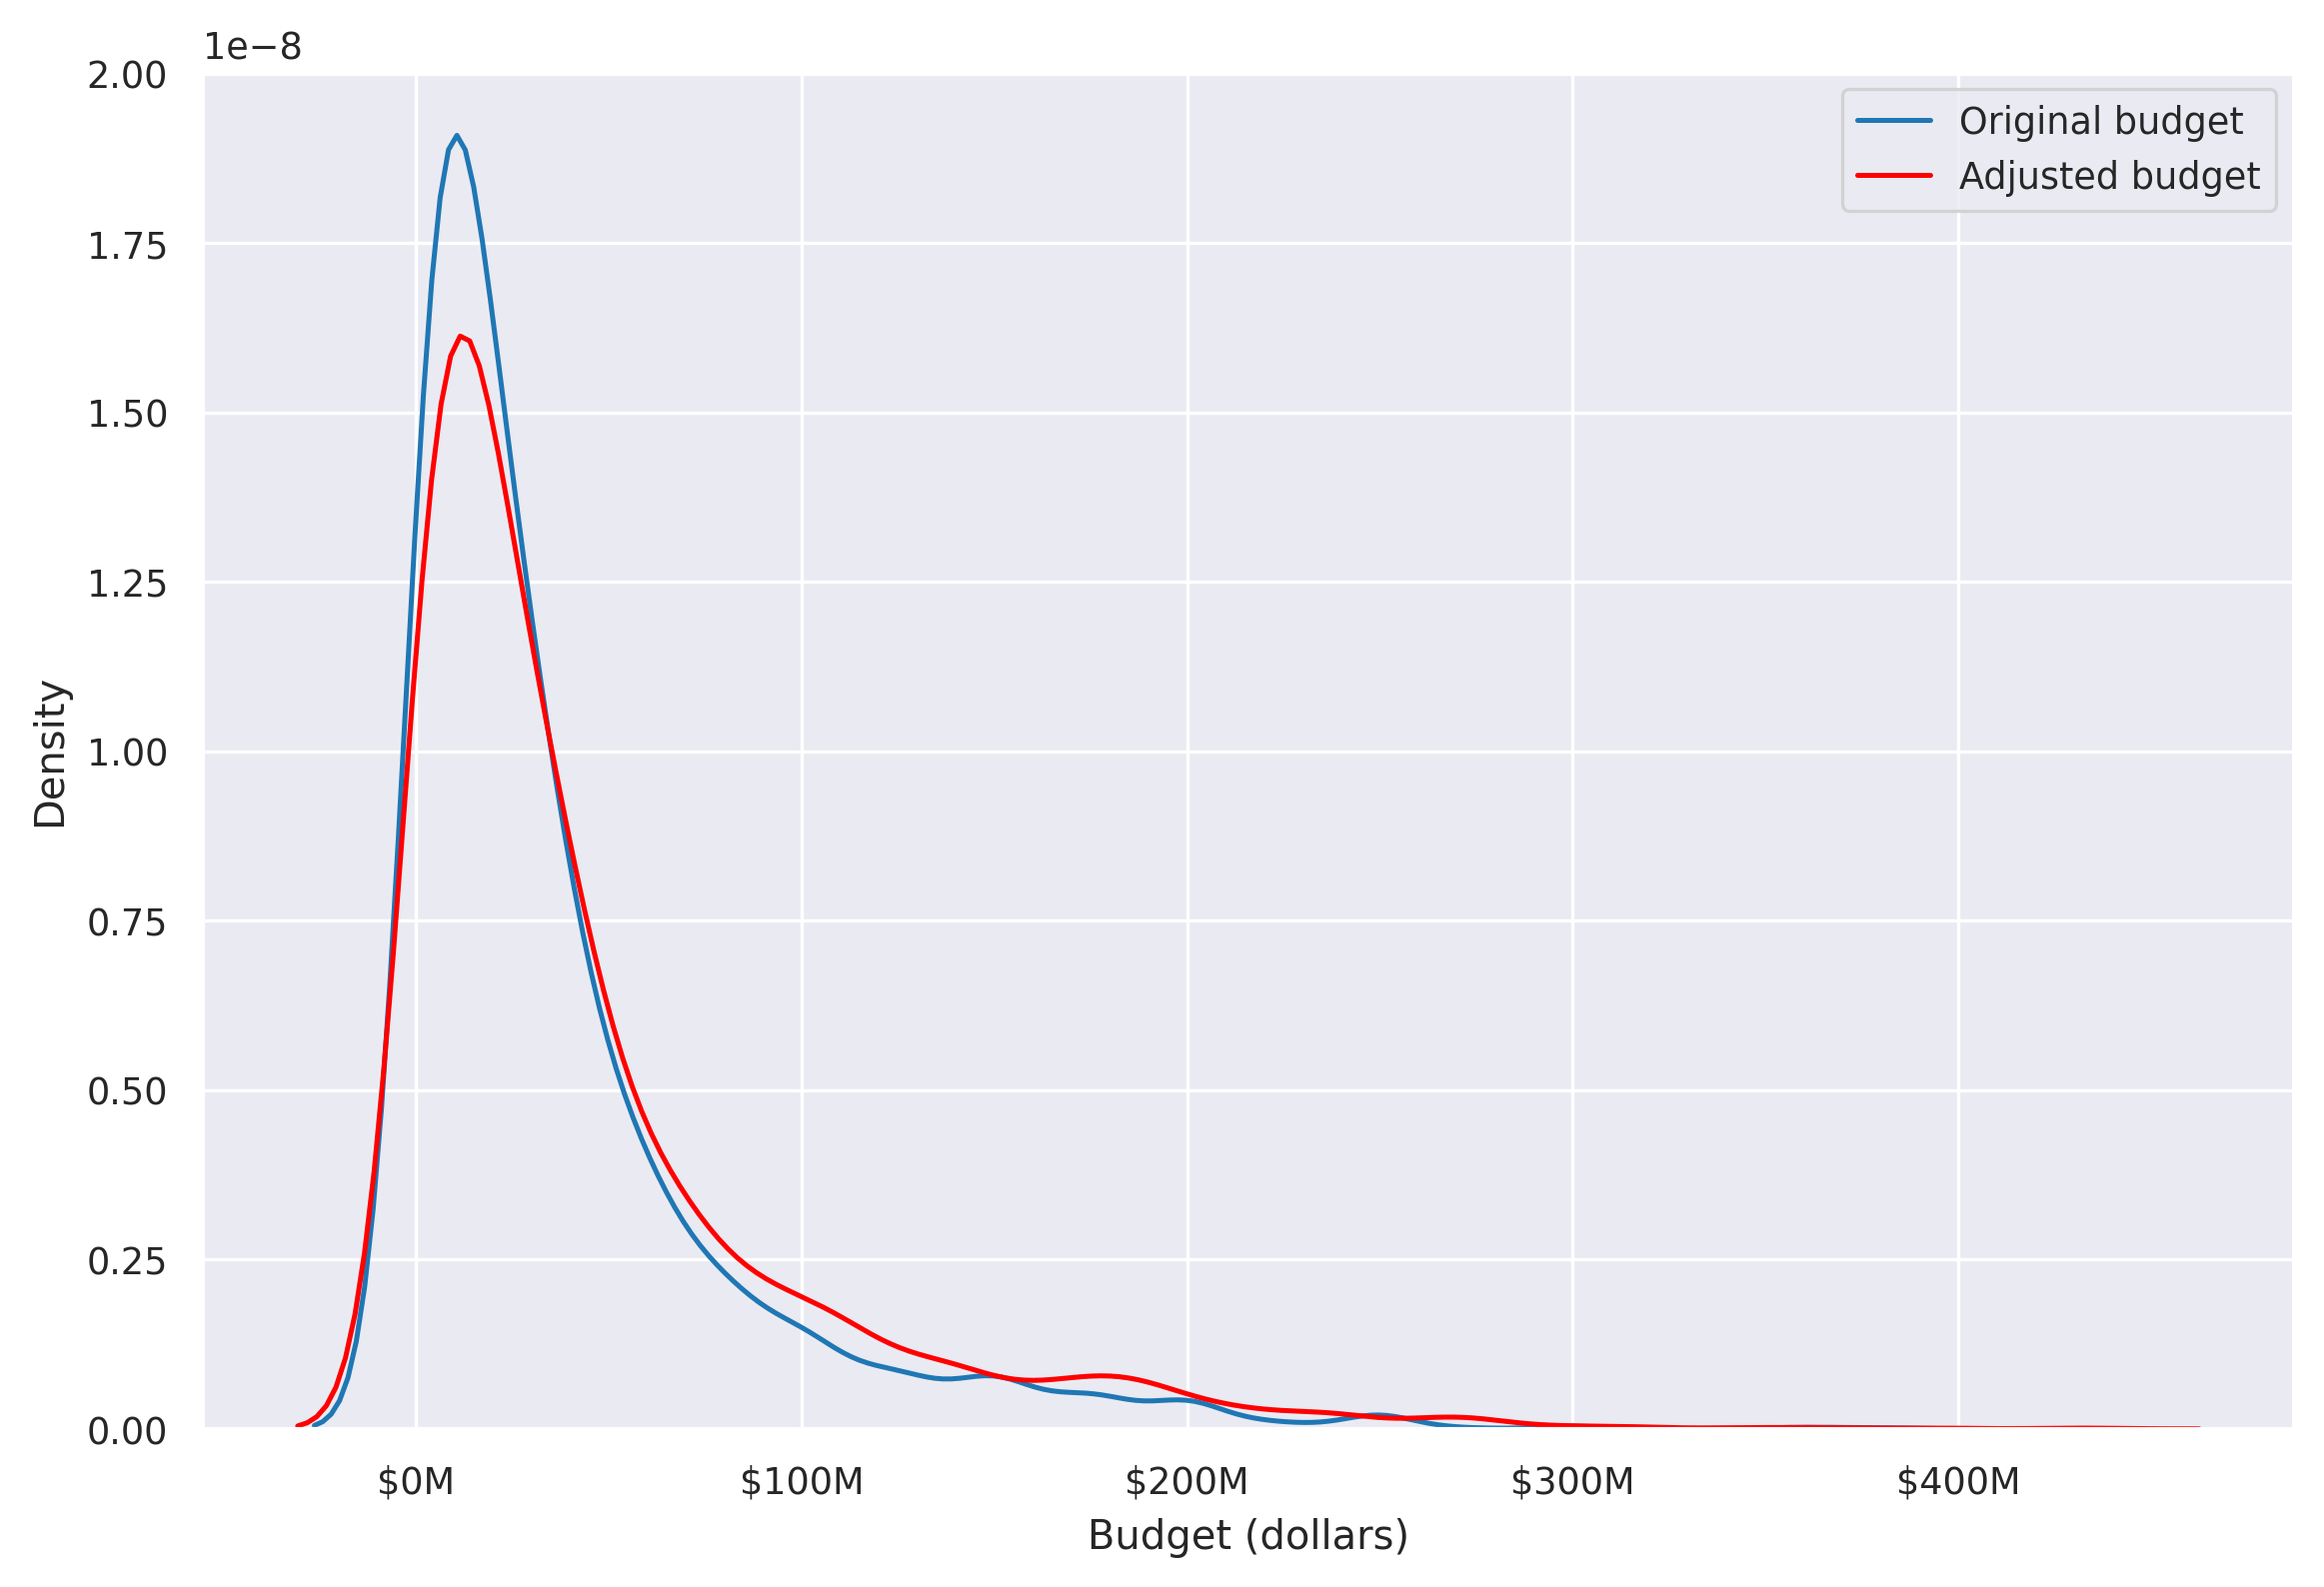

In [63]:
plt.figure(figsize=(9, 6), dpi=300)

sns.kdeplot(data=df, x='budget', label='Original budget')
sns.kdeplot(data=df, x='budget_adj', color='r', label='Adjusted budget')
# quantiles = df.budget_adj.quantile([0.25, 0.5, 0.75])
# height = 1.6932152981991836e-08 * 2/3

# for quant in quantiles:
#   plt.vlines(quant, ymin=0, ymax=height, linestyle=':')

plt.xticks(budget_values, labels=budget_labels)
plt.xlabel('Budget (dollars)')

plt.legend()

# print(plt.ylim())

plt.show()

In [48]:
df.revenue.min(), df.revenue_adj.min()

(714, 1030.903448275862)

In [49]:
df.revenue.max(), df.revenue_adj.max()

(2920357254, 3479852469.3460712)

In [59]:
revenue_values = np.arange(0, 3500000000, 750000000)
revenue_labels = [f'${str(int(value/1000000))}M' if value < 1000000000 else f'${str(value/1000000000)}B' for value in revenue_values]
revenue_labels

['$0M', '$750M', '$1.5B', '$2.25B', '$3.0B']

(-1e-12, 1e-12)


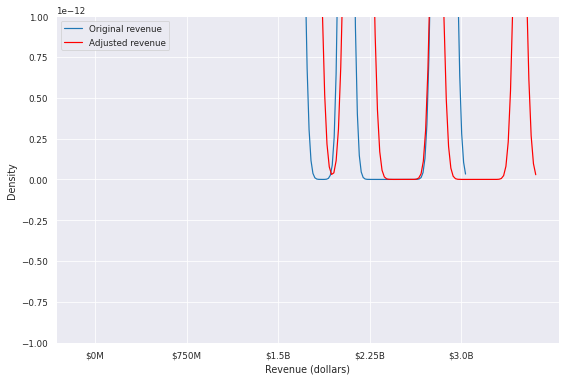

In [61]:
plt.figure(figsize=(9, 6))

sns.kdeplot(data=df, x='revenue', label='Original revenue')
sns.kdeplot(data=df, x='revenue_adj', color='r', label='Adjusted revenue')
# quantiles = df.budget_adj.quantile([0.25, 0.5, 0.75])
# height = 1.6932152981991836e-08 * 2/3

# for quant in quantiles:
#   plt.vlines(quant, ymin=0, ymax=height, linestyle=':')

plt.xticks(revenue_values, labels=revenue_labels)
plt.xlabel('Revenue (dollars)')

plt.legend()

print(plt.ylim())

plt.show()